## Examples and tests PE



# alternative inserts 
import networkx as nx

In [1]:
import rl_parkingplacefinder
from rl_parkingplacefinder import *
import matplotlib.pyplot as plt
from rl_parkingplacefinder import Parking_Lot as Parking_Lot

In [2]:
ffp = Parking_lot.Filling_Function_Parameters(uniform_distribution_p_value = 0.5)

In [3]:
ldp = Parking_lot.Lane_Direction_Parameters()

['number_of_lanes=9']
['number_of_slots=63']


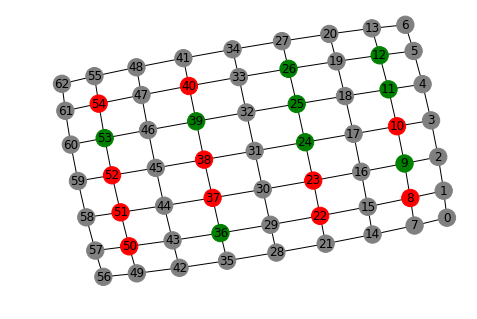

In [5]:
parking_lot = Parking_Lot(lane_direction_paramenters=ldp, 
                         filling_function_parameters=ffp, 
                         nr_parking_slots_per_lane=5,
                         nr_parking_lanes=4, 
                         parking_lane_depth=2, 
                         debug=True,
                         draw_graph = True,
                         show_summary = False
                        )

History:
Step 1: Currently on node 0
Step 2: Currently on node 1
Step 3: Currently on node 0
Step 4: Currently on node 7
Step 5: Currently on node 0
Step 6: Currently on node 7
Step 7: Currently on node 14
Step 8: Currently on node 7
Step 9: Currently on node 0
Step 10: Currently on node 7
Step 11: Currently on node 14
Step 12: Currently on node 15
Step 13: Currently on node 14
Step 14: Currently on node 21
Step 15: Currently on node 14
Step 16: Currently on node 15
Step 17: Currently on node 14
Step 18: Currently on node 7
Step 19: Currently on node 14
Step 20: Currently on node 21
Step 21: Currently on node 14
Step 22: Currently on node 21
Step 23: Currently on node 14
Step 24: Currently on node 21
Step 25: Currently on node 14
Step 26: Currently on node 7
Step 27: Currently on node 0
Step 28: Currently on node 7
Step 29: Currently on node 0
Step 30: Currently on node 1
Step 31: Currently on node 2
Step 32: Currently on node 3
We park in Spot 10 after 32 steps


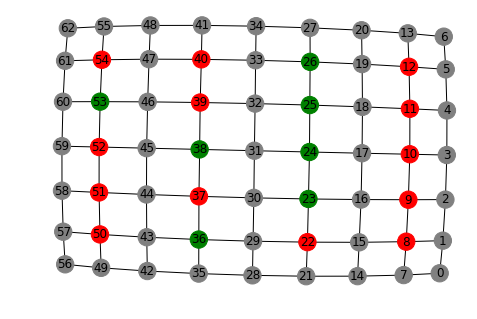

In [17]:
found_slot = -1
agent = Park_Finder_Agent()
found_slot = agent.find_parking(parking_lot)
parking_lot.plot()

To create the agent I added a new dictionary object with key "ocuppation" and possible values "vacant" and "taken" to each "park" node. 

In [9]:
# Example for node found_slot, an occupied parking spot
parking_lot.g.nodes[found_slot]

{'slot_type': 'park', 'occupation': 'taken'}